For this problem set, you will need the following imports.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.integrate import quad
from scipy.optimize import root_scalar, root
from scipy.optimize import minimize, minimize_scalar


## Q1. Write the Python codes to find the zeros of the following functions.

Q1-1. $$ F(x) = \int_{x^2}^\infty \frac{1}{\sqrt{2\pi}} e^{-t^2/2} dt + e^{x} - 3x^3 + 2x + 4$$

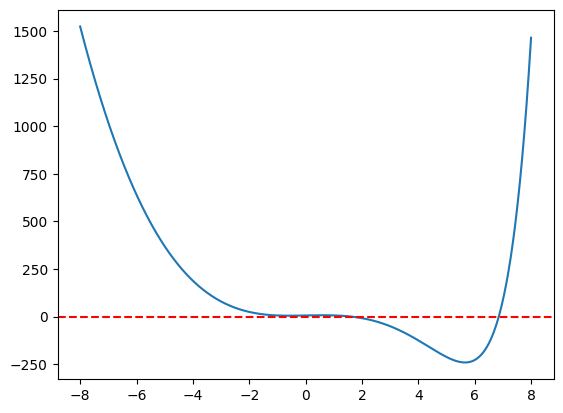

In [65]:
f = lambda t: np.exp(-t**2/2)/np.sqrt(2*np.pi)

def F1(x):
    integral, _ = quad(f, x**2, np.inf)
    return integral + np.exp(x) - 3*x**3 + 2*x + 4

x_values = np.linspace(-8, 8, 1000)
y_values = [F1(x) for x in x_values]

plt.plot(x_values, y_values)
plt.axhline(0, color='red', ls='--', label='0')

plt.show()


In [66]:

sol_1 = root_scalar(F1, method='bisect',bracket=(-2, 2))
sol_2 = root_scalar(F1, method='bisect',bracket=(6, 8))

print(sol_1.root, sol_2.root)


1.5919120291928266 6.8550915234282


Q1-2. $$ F(x) = \int_{\sqrt{x}}^{x^2} \log(t) dt - \sqrt{x} - 3$$

C:\Users\jmine\AppData\Local\Temp\ipykernel_17628\2944673377.py:3: RuntimeWarning: invalid value encountered in sqrt
  integral, _ = quad(integrand, np.sqrt(x), x**2)
C:\Users\jmine\AppData\Local\Temp\ipykernel_17628\2944673377.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand, np.sqrt(x), x**2)
C:\Users\jmine\AppData\Local\Temp\ipykernel_17628\2944673377.py:4: RuntimeWarning: invalid value encountered in sqrt
  return integral - np.sqrt(x) - 3


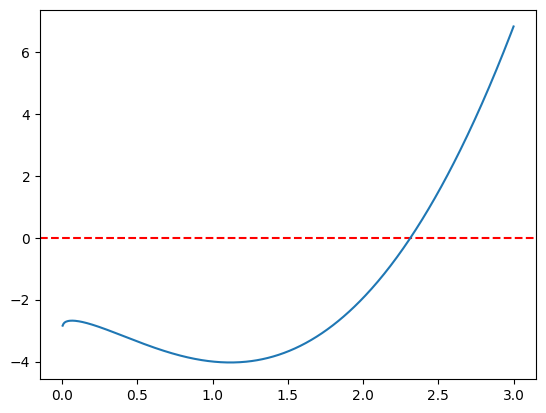

In [67]:
def F2(x):
    integrand = lambda t: np.log(t)
    integral, _ = quad(integrand, np.sqrt(x), x**2)
    return integral - np.sqrt(x) - 3

x_values = np.linspace(-3, 3, 1000)
y_values = [F2(x) for x in x_values]

plt.axhline(0, color='red', ls='--', label='0')
plt.plot(x_values, y_values)
plt.show()

In [68]:
result = root_scalar(F2, bracket=[0.01, 5], method='brentq')

print(result.root)

2.315087640091509


Q1-3. 
$$
\begin{pmatrix}
F_1(x_1, x_2,\cdots,x_9) \\
\vdots \\
F_i(x_1, x_2,\cdots,x_9) \\
\vdots \\
F_9(x_1, x_2,\cdots,x_9)
\end{pmatrix}
=
\begin{pmatrix}
(3-2x_1)x_1 & -2x_2 & & & & & & +1 \\ 
& & & \vdots \\
& & -x_{i-1} & +(3-2x_i)x_i & -2x_{i+1} & & & +1 \\ 
& & & \vdots \\
& & & & & -x_8 & +(3-2x_9)x_9 & +1 \\ 
\end{pmatrix}
=
\begin{pmatrix}
0 \\
\vdots \\
0 \\
\vdots \\
0 \\
\end{pmatrix}
\text{for } i=2, \cdots\, 8
$$


In [69]:
import numpy as np
from scipy.optimize import root

def F3(x):
    f = np.zeros(9)
    f[0] = (3 - 2*x[0])*x[0] - 2*x[1] + 1
    for i in range(1, 8):
        f[i] = -x[i-1] + (3 - 2*x[i])*x[i] - 2*x[i+1] + 1
    f[8] = -x[7] + (3 - 2*x[8])*x[8] + 1
    return f

max_tries = 100000
for i in range(max_tries):
    x0 = np.random.uniform(0, 1, 9)
    sol = root(F3, x0, method='hybr')
    if sol.success:
        print(f"Solution found after {i+1} tries:")
        print(sol.x)
        break
else:
    print(f"Failed to find a solution after {max_tries} tries")



Solution found after 133 tries:
[ 1.83247014 -0.1092416  -0.59203119 -0.68392692 -0.69763083 -0.69117156
 -0.66566004 -0.59600757 -0.41640635]


## Consumer's Utiity Maximization Problem

There are many consumers in an economy who are different in labor productivity $x$. An individual consumer is endowed with one unit of time that can be used on either working to make money for consumption or enjoying as leisure. The wage per hour is given by $w$ that is determined in the market. All consumers receive the identical amount of lump-sum transfer $T$ from government. The utility function of the consumer is given by $ u(c, l) = c^{\frac{1}{3}} l^{\frac{2}{3}}$, where $c$ and $l$ denote consumption and leisure respectively. The consumer's problem can be written as follows:

$$
  \begin{align}
  \max_{c, l} c^{\frac{1}{3}} l^{\frac{2}{3}}\\
  \text{subject to}\quad c = wx(1-l) + T \\
  c \ge 0 \\
  0 \le l \le 1
  \end{align} 
$$
In the next two questions, we solve for the consumer's utility maximization problem in two different ways.


## Q2. Univariate function minimization


Q2-1. You may substitute the constraint (2) into the objective function (1) to make the problem an unconstrained univariable maximization problem with bounds (3) and (4). Write the Python function to compute the optimal consumption, leisure and labor supply $(c^*, l^*, N^s$) for an individual consumer with labor productivity $x$ given the lump-sum transfer $T$ and the market wage $w$. Within the function, solve for the utility maximization problem through the **Bounded** method.

In [70]:
def consumer_maximization(x, w, T):
    def utility_maximization(l, x, w, T):
        c = w*x*(1-l) + T
        return -(c**(1/3)) * (l**(2/3))
    
    res = minimize_scalar(utility_maximization, bounds=(0, 1), args=(x, w, T), method='bounded')
    l_star = res.x
    c_star = w*x*(1-l_star) + T
    Ns_star = x*(1-l_star)

    
    return c_star, l_star, Ns_star

Q2-2. For the time being, assume that $w=2$, $T=0.5$ and $\sigma_x=0.3$. Draw the graphs for the optimal consumption and leisure for 30 individuals whose log productivities are equally distributed over the range $\log{x} \in [-3\sigma_x, +3\sigma_x]$.

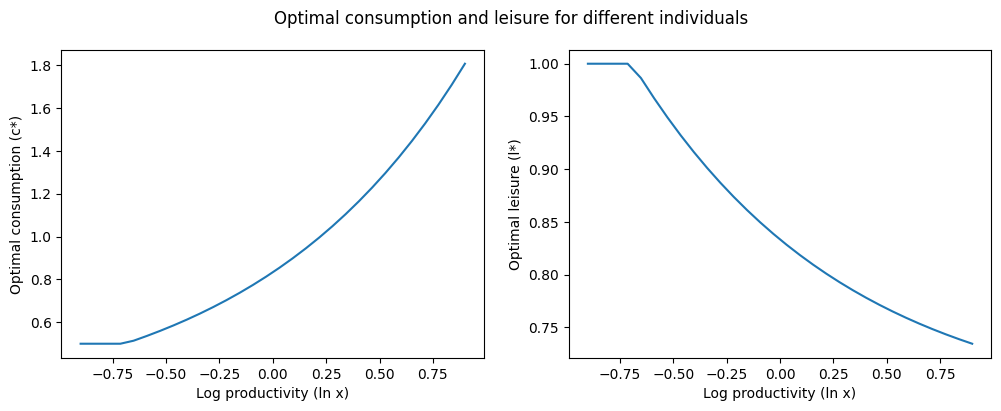

In [ ]:

w = 2
T = 0.5
sigma_x = 0.3
log_x_val = np.linspace(-3*sigma_x, 3*sigma_x,30)


optimal_consumptions = []
optimal_leisures = []
for log_x in log_x_val:
    x = np.exp(log_x)
    c_star, l_star, _ = consumer_maximization(x, w, T)
    optimal_consumptions.append(c_star)
    optimal_leisures.append(l_star)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Optimal consumption and leisure for different individuals")

ax[0].plot(log_x_val, optimal_consumptions, '-')
ax[0].set_xlabel("Log productivity (ln x)")
ax[0].set_ylabel("Optimal consumption (c*)")

ax[1].plot(log_x_val, optimal_leisures, '-')
ax[1].set_xlabel("Log productivity (ln x)")
ax[1].set_ylabel("Optimal leisure (l*)")

plt.show()


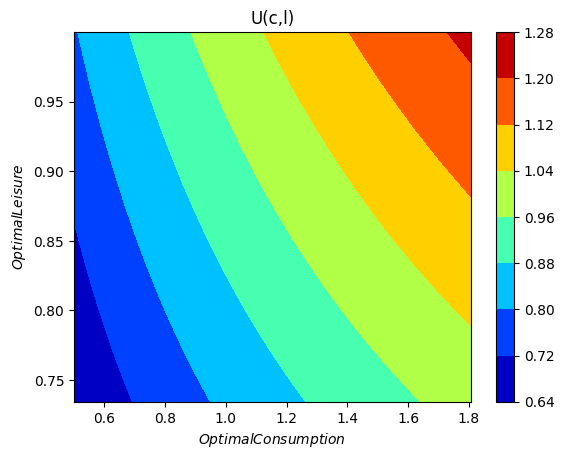

In [ ]:
fou = lambda c,l: (c**(1/3)) * (l**(2/3))


c_grid=np.array(optimal_consumptions)
l_grid=np.array(optimal_leisures)  
x0, x1 = np.meshgrid(c_grid, l_grid)


plt.contourf(c_grid, l_grid, fou(x0,x1), cmap=plt.cm.jet)
plt.xlabel('$Optimal Consumption$')
plt.ylabel('$Optimal Leisure$')
plt.title('U(c,l)')
plt.colorbar()
plt.show()


Q2-3. Draw the labor supply curve for the following two individuals as the market wage varies over the range of $w\in[1,4]$.

- Individual 1: $\log{x} = -\sigma_x$
- Individual 3: $\log{x} = \sigma_x$


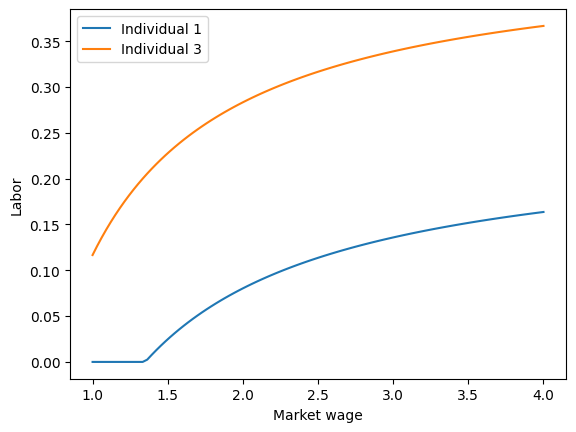

In [ ]:
T = 0.5
sigma_x = 0.3


w_range = np.linspace(1, 4, num=100)

optimal_l1 = np.zeros_like(w_range)
optimal_l3 = np.zeros_like(w_range)



for i, w in enumerate(w_range):
    x1 = np.exp(-sigma_x)
    res1 = consumer_maximization(x1,w,T)
    optimal_l1[i] = res1[2]
    
    x3 = np.exp(sigma_x)
    res3 = consumer_maximization(x3,w,T)
    optimal_l3[i] = res3[2]



plt.plot(w_range, optimal_l1, label='Individual 1')
plt.plot(w_range, optimal_l3, label='Individual 3')
plt.xlabel('Market wage')
plt.ylabel('Labor')
plt.legend()
plt.show()





## Q3. Minimization of multivariate function with constraint

Q3-1. In this question, we will solve for the utility maximization as specified by equations (1)~(4). Write the Python function to compute the optimal consumption, leisure and labor supply $(c^*, l^*, N^s$) for an individual consumer with labor productivity $x$ given the lump-sum transfer $T$ and the market wage $w$. Within the function, solve for the utility maximization problem through the **Sequential Lest Squares Programming** algorithm.

In [78]:

def consumer_maximization_2(x, w, T):
    def utility_fun(vars):
        c, l = vars
        return -(c**(1/3) * l**(2/3))
    
    def constraint1(vars):
        c, l = vars
        return c - w*x*(1-l) - T
    
    def constraint2(vars):
        c, l = vars
        return c
    
    def constraint3(vars):
        c, l = vars
        return l
    
    bounds = [(0, None), (0, 1)]
    constraints = [{'type': 'eq', 'fun': constraint1},
                   {'type': 'ineq', 'fun': constraint2},
                   {'type': 'ineq', 'fun': constraint3}]
    
    initial_guess = [w*x/2, 0.5]  
    solution = minimize(utility_fun, initial_guess, method='SLSQP',
                        bounds=bounds, constraints=constraints)
    
    return solution.x[0], solution.x[1], x*(1-solution.x[1])




Q3-2. Do again Q2-2 and Q2-3 using the function in Q3-1.

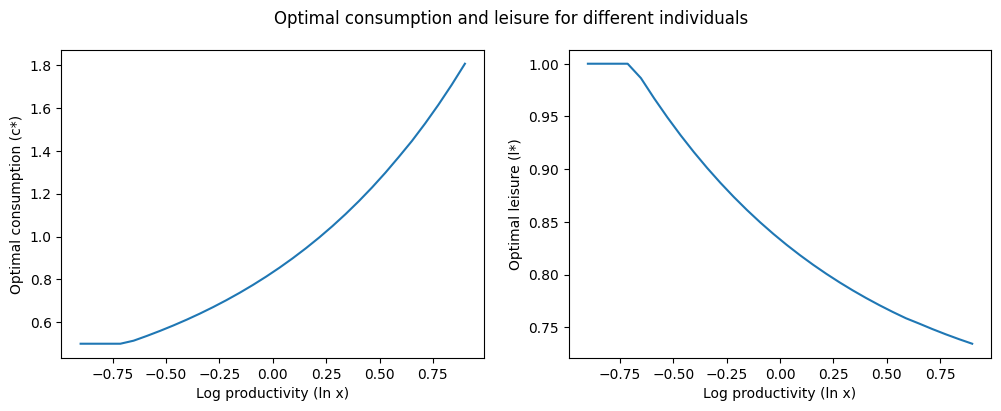

In [79]:

w=2
T = 0.5
sigma_x = 0.3
log_x_val = np.linspace(-3*sigma_x, 3*sigma_x,30)


optimal_consumptions = []
optimal_leisures = []
for log_x in log_x_val:
    x = np.exp(log_x)
    c_star, l_star, _ = consumer_maximization_2(x, w, T)
    optimal_consumptions.append(c_star)
    optimal_leisures.append(l_star)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle("Optimal consumption and leisure for different individuals")

ax[0].plot(log_x_val, optimal_consumptions, '-')
ax[0].set_xlabel("Log productivity (ln x)")
ax[0].set_ylabel("Optimal consumption (c*)")

ax[1].plot(log_x_val, optimal_leisures, '-')
ax[1].set_xlabel("Log productivity (ln x)")
ax[1].set_ylabel("Optimal leisure (l*)")

plt.show()


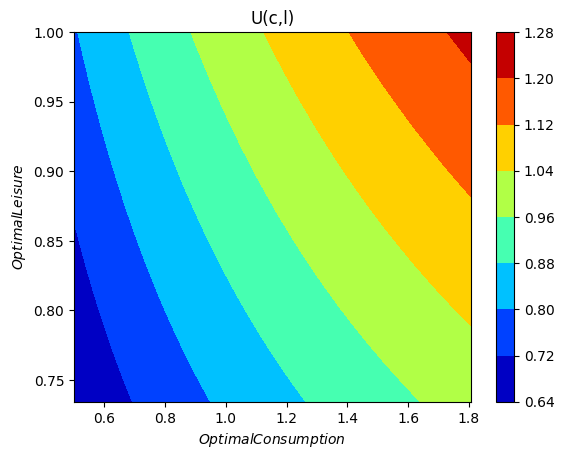

In [80]:
fou = lambda c,l: (c**(1/3)) * (l**(2/3))


c_grid=np.array(optimal_consumptions)
l_grid=np.array(optimal_leisures)  
x0, x1 = np.meshgrid(c_grid, l_grid)


plt.contourf(c_grid, l_grid, fou(x0,x1), cmap=plt.cm.jet)
plt.xlabel('$Optimal Consumption$')
plt.ylabel('$Optimal Leisure$')
plt.title('U(c,l)')
plt.colorbar()
plt.show()


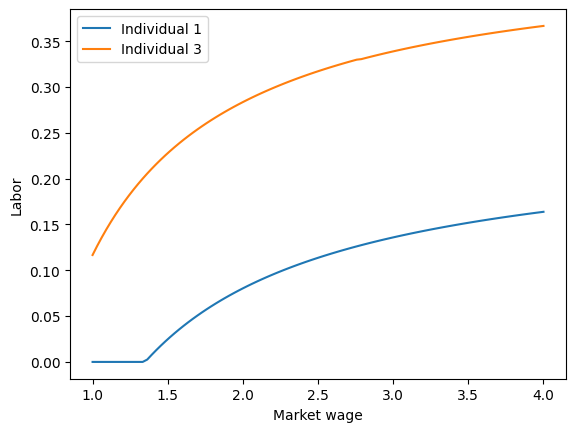

In [81]:
T = 0.5
sigma_x = 0.3

w_range = np.linspace(1, 4, num=100)

optimal_l1 = np.zeros_like(w_range)
optimal_l3 = np.zeros_like(w_range)



for i, w in enumerate(w_range):
    x1 = np.exp(-sigma_x)
    res1 = consumer_maximization_2(x1,w,T)
    optimal_l1[i] = res1[2]
    
    x3 = np.exp(sigma_x)
    res3 = consumer_maximization_2(x3,w,T)
    optimal_l3[i] = res3[2]



plt.plot(w_range, optimal_l1, label='Individual 1')
plt.plot(w_range, optimal_l3, label='Individual 3')
plt.xlabel('Market wage')
plt.ylabel('Labor')
plt.legend()
plt.show()


Q3-3. Suppose that there are 10,000 individuals in the economy whose labor productivities are drawn from the following distributionis: $\log{x}\sim N(0, \sigma_x^2)$. Each individual behaves according to the utility maximization problem described above. Compute and draw histogram of the labor supplies of 10,000 individuals assuming the market wage being equal to 2.

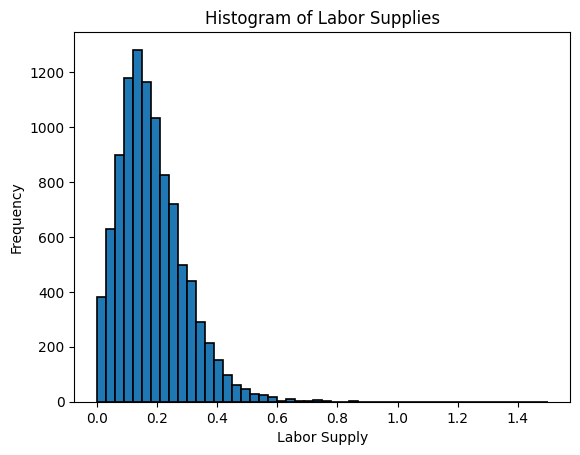

In [89]:

sigma_x = 0.3
N = 10000


N_S = lambda x: consumer_maximization_2(x, w=2, T=0.5)[2]

x = np.exp(np.random.normal(0, sigma_x, N))

labor_supply_all = np.array([N_S(x_i) for x_i in x])

plt.hist(labor_supply_all, bins=50, range=(0, 1.5), edgecolor='black', linewidth=1.2)

plt.xlabel('Labor Supply')
plt.ylabel('Frequency')
plt.title('Histogram of Labor Supplies')

plt.show()


Q3-4. Draw the aggregate labor supply curve of the above economy as the market wage varies over the range of $w\in[1,4]$.

- create 15 grids of the market wages $w\in[1,4]$.
- for each $w$ compute labor supplies of 10,000 inividuals with different labor productivity as you did in Q3-3.
- the aggregate labor supply for a given $w$ is equal to the mean of labor supplies of the 10,000 individuals.
- plot the aggregate labor supply curve.

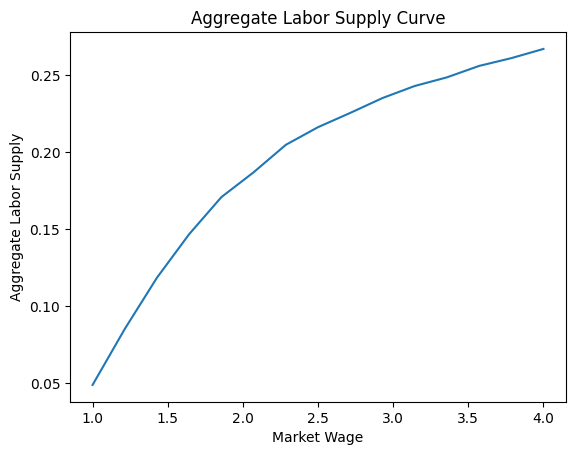

In [92]:
N = 10000
sigma_x = 0.3
T=0.5
agg_labor_supply=[]


w_grid = np.linspace(1, 4, num=15)
for w in w_grid:

    N_S = lambda x: consumer_maximization_2(x, w, T=0.5)[2]
    x = np.exp(np.random.normal(0, sigma_x, N))

    labor_supply = np.array([N_S(x_i) for x_i in x])
    mean=np.mean(labor_supply)
    agg_labor_supply.append(mean)

    
plt.plot(w_grid, agg_labor_supply)

# Add labels and title
plt.xlabel('Market Wage')
plt.ylabel('Aggregate Labor Supply')
plt.title('Aggregate Labor Supply Curve')

# Show plot
plt.show()